# Introduction
- Provide some relevant background information on the topic so that someone unfamiliar with it will be prepared to understand the rest of your proposal 

- Clearly state the question you will try to answer with your project 

- Identify and describe the dataset that will be used to answer the question

# Methods

- Explain how you will conduct either your data analysis and which variables/columns you will use. Note - you do not need to use all variables/columns that exist in the raw data set. In fact, that's often not a good idea. For each variable think: is this a useful variable for prediction? 

- Describe at least one way that you will visualize the results

# Expected outcomes and significance

- What do you expect to find? What impact could such findings have? What future questions could this lead to?

# Preliminary exploratory data analysis

- Demonstrate that the dataset can be read from the web into R 

- Clean and wrangle your data into a tidy format 

- Using only training data, summarize the data in at least one table (this is exploratory data analysis). An example of a useful table could be one that reports the number of observations in each class, the means of the predictor variables you plan to use in your analysis and how many rows have missing data. 

- Using only training data, visualize the data with at least one plot relevant to the analysis you plan to do (this is exploratory data analysis).An example of a useful visualization could be one that compares the distributions of each of the predictor variables you plan to use in your analysis. 


In [8]:
# Libaries
library(tidyverse)
library(dplyr)
library(tidymodels)

In [16]:
# Reading the data using read_delim 
# using read_delim and taking it from a url, however taking the csv file from the original website also works)
# Changing column names so they have underscores using colnames
# Mutating quality column into a factor so it can be used as a class for classification

red_wine_url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
white_wine_url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"

red_data <- read_delim(red_wine_url, delim = ";")%>%
mutate(quality = as_factor(quality))

colnames(red_data) <- c("fixed_acidity", "volatile_acidity", "citric_acid", "residual_sugar", 
                             "chlorides", "free_sulfur_dioxide", "total_sulfur_dioxide", "density", 
                             "ph", "sulfates", "alcohol", "quality")

white_data <- read_delim(white_wine_url, delim = ";")%>% 
mutate(quality = as_factor(quality))

colnames(white_data) <- c("fixed_acidity", "volatile_acidity", "citric_acid", "residual_sugar", 
                             "chlorides", "free_sulfur_dioxide", "total_sulfur_dioxide", "density", 
                             "ph", "sulfates", "alcohol", "quality")


red_data
white_data

Parsed with column specification:
cols(
  `fixed acidity` = col_double(),
  `volatile acidity` = col_double(),
  `citric acid` = col_double(),
  `residual sugar` = col_double(),
  chlorides = col_double(),
  `free sulfur dioxide` = col_double(),
  `total sulfur dioxide` = col_double(),
  density = col_double(),
  pH = col_double(),
  sulphates = col_double(),
  alcohol = col_double(),
  quality = col_double()
)

Parsed with column specification:
cols(
  `fixed acidity` = col_double(),
  `volatile acidity` = col_double(),
  `citric acid` = col_double(),
  `residual sugar` = col_double(),
  chlorides = col_double(),
  `free sulfur dioxide` = col_double(),
  `total sulfur dioxide` = col_double(),
  density = col_double(),
  pH = col_double(),
  sulphates = col_double(),
  alcohol = col_double(),
  quality = col_double()
)



fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulfates,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
7.4,0.700,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
7.8,0.880,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
7.8,0.760,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
11.2,0.280,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
7.4,0.700,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
7.4,0.660,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5
7.9,0.600,0.06,1.6,0.069,15,59,0.9964,3.30,0.46,9.4,5
7.3,0.650,0.00,1.2,0.065,15,21,0.9946,3.39,0.47,10.0,7
7.8,0.580,0.02,2.0,0.073,9,18,0.9968,3.36,0.57,9.5,7


fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulfates,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
7.0,0.27,0.36,20.70,0.045,45,170,1.0010,3.00,0.45,8.8,6
6.3,0.30,0.34,1.60,0.049,14,132,0.9940,3.30,0.49,9.5,6
8.1,0.28,0.40,6.90,0.050,30,97,0.9951,3.26,0.44,10.1,6
7.2,0.23,0.32,8.50,0.058,47,186,0.9956,3.19,0.40,9.9,6
7.2,0.23,0.32,8.50,0.058,47,186,0.9956,3.19,0.40,9.9,6
8.1,0.28,0.40,6.90,0.050,30,97,0.9951,3.26,0.44,10.1,6
6.2,0.32,0.16,7.00,0.045,30,136,0.9949,3.18,0.47,9.6,6
7.0,0.27,0.36,20.70,0.045,45,170,1.0010,3.00,0.45,8.8,6
6.3,0.30,0.34,1.60,0.049,14,132,0.9940,3.30,0.49,9.5,6


In [21]:
#Let's split our data into testing and training data, and look at the training data so we can apply exploraty analysis

red_split<-initial_split(red_data, prop=0.75, strata = quality)
red_train<-training(red_split)
red_test<-testing(red_split)

white_split<-initial_split(white_data, prop=0.75, strata = quality)
white_train<-training(white_split)
white_test<-testing(white_split)

red_train
white_train

fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulfates,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
7.4,0.700,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
7.8,0.880,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
7.8,0.760,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
7.9,0.600,0.06,1.6,0.069,15,59,0.9964,3.30,0.46,9.4,5
7.3,0.650,0.00,1.2,0.065,15,21,0.9946,3.39,0.47,10.0,7
7.8,0.580,0.02,2.0,0.073,9,18,0.9968,3.36,0.57,9.5,7
7.5,0.500,0.36,6.1,0.071,17,102,0.9978,3.35,0.80,10.5,5
6.7,0.580,0.08,1.8,0.097,15,65,0.9959,3.28,0.54,9.2,5
5.6,0.615,0.00,1.6,0.089,16,59,0.9943,3.58,0.52,9.9,5


fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulfates,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
7.0,0.27,0.36,20.70,0.045,45,170,1.0010,3.00,0.45,8.8,6
6.3,0.30,0.34,1.60,0.049,14,132,0.9940,3.30,0.49,9.5,6
7.2,0.23,0.32,8.50,0.058,47,186,0.9956,3.19,0.40,9.9,6
7.2,0.23,0.32,8.50,0.058,47,186,0.9956,3.19,0.40,9.9,6
8.1,0.28,0.40,6.90,0.050,30,97,0.9951,3.26,0.44,10.1,6
6.2,0.32,0.16,7.00,0.045,30,136,0.9949,3.18,0.47,9.6,6
7.0,0.27,0.36,20.70,0.045,45,170,1.0010,3.00,0.45,8.8,6
6.3,0.30,0.34,1.60,0.049,14,132,0.9940,3.30,0.49,9.5,6
8.1,0.22,0.43,1.50,0.044,28,129,0.9938,3.22,0.45,11.0,6


In [18]:
#Let's summarize the data by figuring out how many wines are in each class (each quality ranking)
red_wine_quality_count<- red_train %>% 
                       group_by(quality) %>%
                       summarize(count = n())
red_wine_quality_count

white_wine_quality_count<- white_train %>% 
                       group_by(quality) %>%
                       summarize(count = n())
white_wine_quality_count

`summarise()` ungrouping output (override with `.groups` argument)



quality,count
<fct>,<int>
3,8
4,35
5,512
6,479
7,155
8,11


`summarise()` ungrouping output (override with `.groups` argument)



quality,count
<fct>,<int>
3,16
4,119
5,1093
6,1657
7,660
8,126
9,3


Let's make some visualization to see how different variables affect eachother, and how they relate to the class (quality)

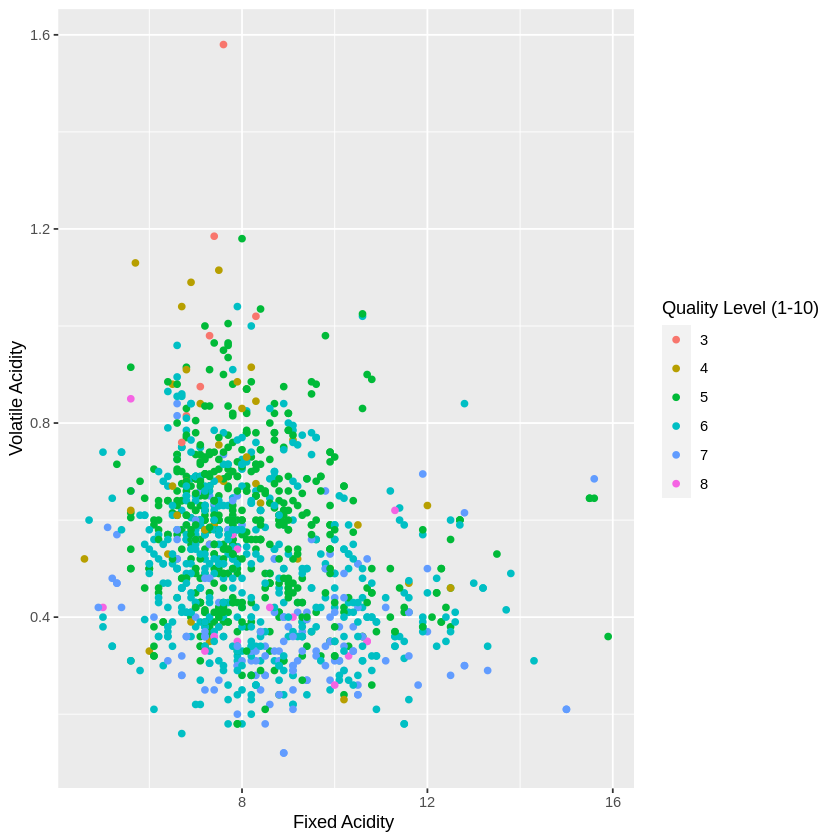

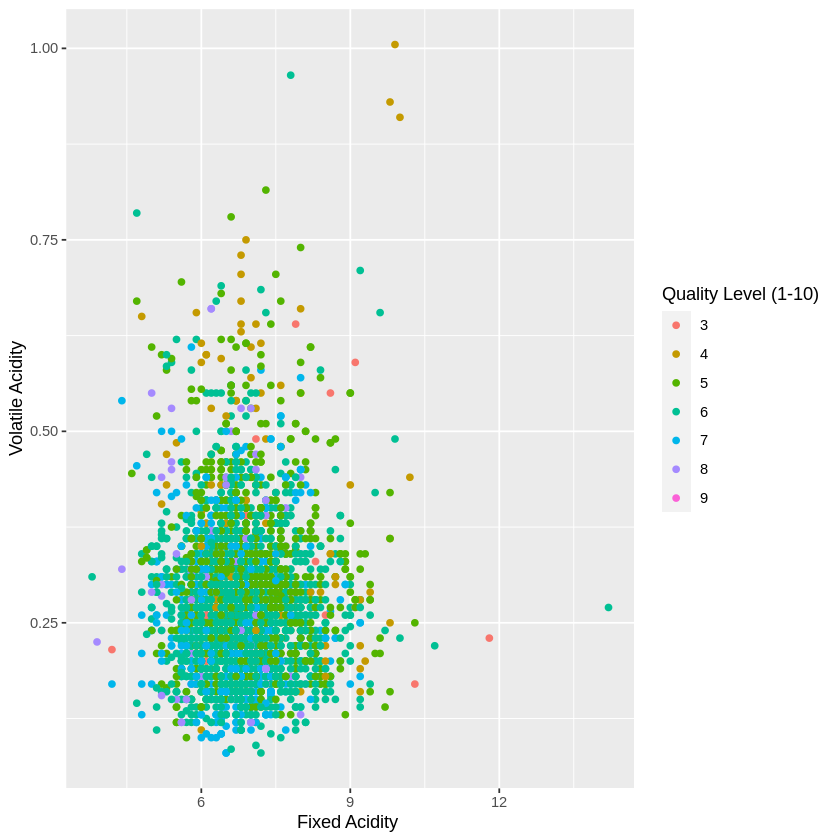

In [41]:
#Plotting types of acidity and observing whether there is a pattern in quality level
acidity_plot_r<-ggplot(red_train, aes(x = fixed_acidity, y = volatile_acidity, colour = quality))+
geom_point()+
labs(x = "Fixed Acidity ", y = "Volatile Acidity", colour = "Quality Level (1-10)")

acidity_plot_r

acidity_plot_w <-ggplot(white_train, aes(x = fixed_acidity, y = volatile_acidity, colour = quality))+
geom_point()+

labs(x = "Fixed Acidity ", y = "Volatile Acidity", colour = "Quality Level (1-10)")

acidity_plot_w


Both plots shows that volatile acidity and quality level seems to have a negative relationship, with higher quality wines having a relatively lower volatile acidity value (more blue and purple at bottom, more red and yellow at top). However, it does not seem like fixed acidity has any effect on the quality level. Further, white wine seems to haev a more narrow range of fixed acidity, whereas red whine has al arger range of fixed acidity

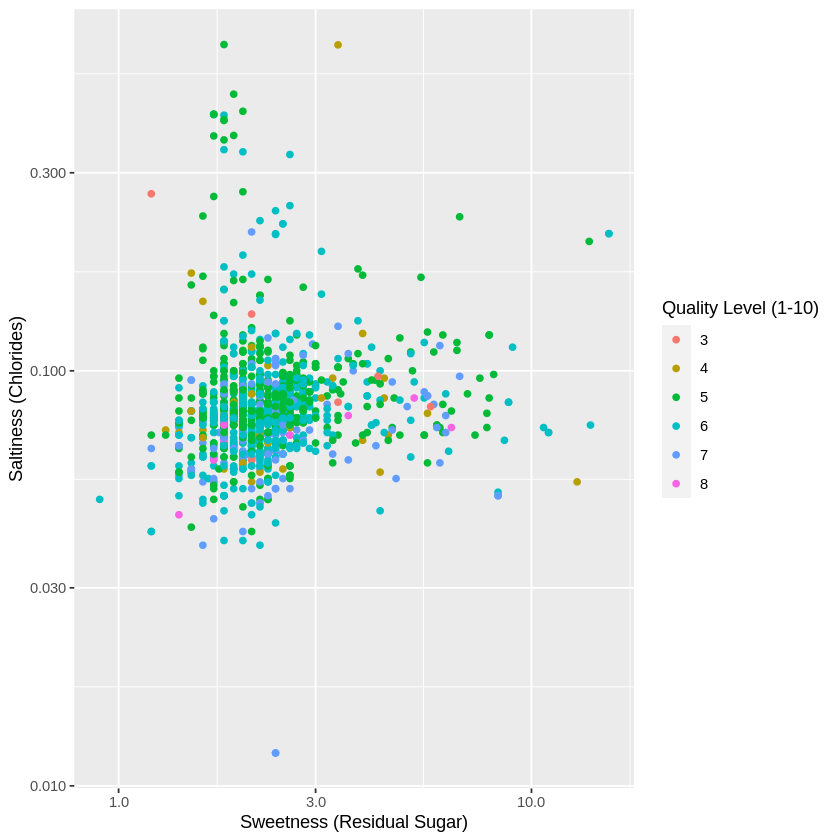

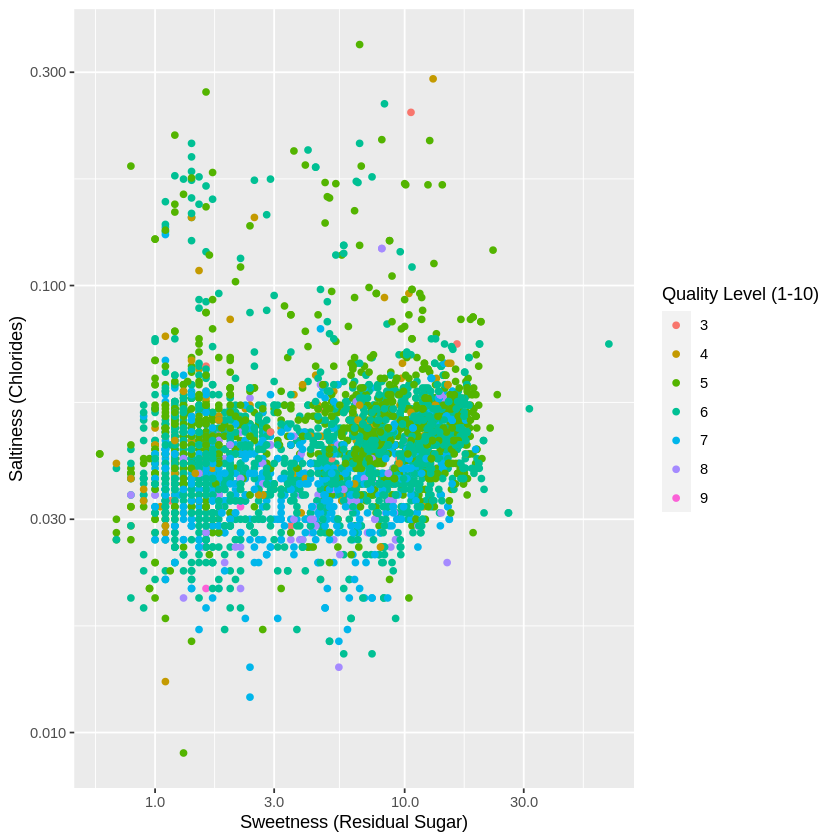

In [42]:
#Plotting sugar levels and saltiness flavour (Chloride levels) and seeing how they relate to quality

sugar_chloride_plot_r <-ggplot(red_train, aes(x = residual_sugar, y = chlorides, colour = quality))+
geom_point()+
scale_x_log10(labels = label_comma())+
scale_y_log10(labels = label_comma())+
labs(x = "Sweetness (Residual Sugar)", y = "Saltiness (Chlorides)", colour = "Quality Level (1-10)")


sugar_chloride_plot_r

#Let's look at whether this trend is similar in white whine

sugar_chloride_plot_w <-ggplot(white_train, aes(x = residual_sugar, y = chlorides, colour = quality))+
geom_point()+
scale_x_log10(labels = label_comma())+
scale_y_log10(labels = label_comma())+
labs(x = "Sweetness (Residual Sugar)", y = "Saltiness (Chlorides)", colour = "Quality Level (1-10)")

sugar_chloride_plot_w

There seems to be no real observed pattern between sugar and chloride levels and the quality the wine gets. We will have to look further on whether we will use these variables (in the foward selection process)

# Methods